In [52]:
%load_ext autoreload
%autoreload 2

import h5py

import sys
sys.path.append("/Volumes/GoogleDrive/My Drive/XPS/XPS_Library")
from copy import deepcopy as dc

from xps import data_io
from xps.pyfit_gui import guipyter
from xps.sample import *
import xps.sample
import xps.io
from lmfit.models import GaussianModel, LorentzianModel, PseudoVoigtModel, SkewedVoigtModel
from xps.gui_element_dicts import *
from xps.helper_functions import *

from lmfit.model import load_model
import glob


from IPython.display import clear_output


import numpy as np
from numpy.random import randn
from numpy.random import seed

from scipy.stats import pearsonr
from sklearn.decomposition import PCA


import matplotlib.patches as mpatches

# %matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
### Create Dicitonary for the crop limits
croplimdic = {}
croplimdic['Si2p'] = [(97.5,107), 'linear']
# croplimdic['Si2p'] = [(98.5,108), 'UT2', (681,1,355,0), (0,-1)]

# croplimdic['Ti2p'] = [(452.5,470), 'shirley']
croplimdic['Ti2p'] = [(452.5,470), 'UT2', (681,1,355,0), (0,-1)]

croplimdic['O1s'] = [(527.5,537), 'shirley']
# croplimdic['O1s'] = [(527.5,537), 'UT2', (681,1,355,0), (0,-1)]
croplimdic['N1s'] = [(394,402), 'shirley']
# croplimdic['N1s'] = [(394,402), 'UT2', (681,1,355,0), (0,-1)]

croplimdic['C1s'] = [(282,292), 'shirley']
# croplimdic['C1s'] = [(284,290), 'UT2', (681,1,355,0), 5]

croplimdic['F1s'] = [(682.5,693.85), 'shirley']
croplimdic['Nb3d'] = [(201,212.5), 'shirley']
# croplimdic['Nb3d'] = [(394,402), 'UT2', (681,1,355,0), (0,-1)]

croplimdic['Valence'] = [(0,0), 'shirley']
croplimdic['XPS'] = [(0,0), 'shirley']

In [3]:
treatment = {'ResA-015':0,\
 'ResA-016':0,\
 'ResA-017':0,\
 'Res-025':0,\
 'Res-026':0,\
 'Res-027':0,\
 'ResD-1m-013':1,\
 'ResD-21m-014':1,\
 'ResD_10m_023':1,\
 'ResD_1m_016':1,\
 'ResD_40m_017':1,\
 'ResD_5m_018':1,\
 'ResD_15m_024_af':1,\
 'ResD_20m_028':1,\
 'half2':1,\
 'K190511-A_left_area':0,\
 'K190511-A_right_area':0,\
 'Res-030-bf':0,\
 'Res-029-af':0}

In [19]:
samplelist  = [f for f in glob.glob('/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/samples/*')]
for i in range(len(samplelist)):
    print(samplelist[i])
    if (samplelist[i].split('/')[-1] != 'ResA_008') and (samplelist[i].split('/')[-1] != 'ResD_30s_OG')\
    and (samplelist[i].split('/')[-1] != 'ResD_60s_009') and (samplelist[i].split('/')[-1] != 'ResD_4min')\
    and (samplelist[i].split('/')[-1] != 'half1') and (samplelist[i].split('/')[-1] != 'Oxide Growth 2')\
    and (samplelist[i].split('/')[-1] != 'Res_N2plasma test_01') and (samplelist[i].split('/')[-1] != 'sample1')\
    and (samplelist[i].split('/')[-1] != 'sample2')\
    and (samplelist[i].split('/')[-1] != 'ResD-1m-013'):
        
        restemp = xps.io.load_sample(samplelist[i].split('/')[-1], overview = False)
        restemp.bksub_all(croplimdic)
        
        dd = {key: [restemp.O1s.fit_results[i].params.valuesdict()[key] \
                    for i in range(len(restemp.O1s.fit_results))] \
              for key in restemp.O1s.fit_results[0].params.valuesdict().keys()}       
        
        dftemp = pd.DataFrame(dd)
        dftemp['sample'] = [restemp.sample_name]*len(restemp.O1s.fit_results)
        dftemp['boe'] = [treatment[restemp.sample_name]]*len(restemp.O1s.fit_results)
        if i ==0:
            o = restemp.data['O1s']['isub']
            e_og = restemp.data['O1s']['esub']
            dfo = dftemp
            
        else:
            o = np.append(o,restemp.data['O1s']['isub'],axis = 0)
            e = restemp.data['O1s']['esub']
            if not all(e == e_og):
                print(restemp.sample_name,'has different elims')
                break
            else:
                e_og = dc(e)
                dfo = dfo.append(dftemp)
    
    clear_output(wait = True)
    
o_norm = np.empty(o.shape)

for i in range(len(o)):
    o_norm[i,:] = o[i,:]/np.trapz(o[i,:])
e = restemp.data['O1s']['esub']

/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/samples/ResD-21m-014
ResD-21m-014-Nb3d
ResD-21m-014-Si2p
ResD-21m-014-C1s


AttributeError: 'xps_sample' object has no attribute 'O1s'

In [55]:
f.close()

In [59]:
samplelist  = [f for f in glob.glob('/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/samples/*')]
spectra = 'O1s'
samples_loaded = []
for i in range(len(samplelist)):
    print(samplelist[i])
    if (samplelist[i].split('/')[-1] != 'ResA_008') and (samplelist[i].split('/')[-1] != 'ResD_30s_OG')\
    and (samplelist[i].split('/')[-1] != 'ResD_60s_009') and (samplelist[i].split('/')[-1] != 'ResD_4min')\
    and (samplelist[i].split('/')[-1] != 'half1') and (samplelist[i].split('/')[-1] != 'Oxide Growth 2')\
    and (samplelist[i].split('/')[-1] != 'Res_N2plasma test_01') and (samplelist[i].split('/')[-1] != 'sample1')\
    and (samplelist[i].split('/')[-1] != 'sample2')\
    and (samplelist[i].split('/')[-1] != 'ResD-1m-013'):
        
#         restemp = xps.io.load_sample(samplelist[i].split('/')[-1], overview = False)
#         restemp.bksub_all(croplimdic)
        
        filepath = os.path.join('/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/dev/xps_samples',samplelist[i].split('/')[-1],'XPS_'+samplelist[i].split('/')[-1]+'.hdf5')
        f= h5py.File(filepath,"r")
        experiment = list(f.keys())[0]
        sample_name = f[experiment].attrs['sample_name']
        
        params = lm.parameter.Parameters()
        modres = lm.model.ModelResult(lm.model.Model(lambda x: x, None), params)
        
        try:
            fit_res = [modres.loads(f[experiment][spectra]['fit_results'][...][i]) for i in range(len(f[experiment][spectra]['fit_results'][...]))]
            dd = {key: [fit_res[i].params.valuesdict()[key] \
                        for i in range(len(fit_res))] \
                  for key in fit_res[0].params.valuesdict().keys()}
            samples_loaded.append(sample_name)
        except:
            pass
        
        dftemp = pd.DataFrame(dd)
        dftemp['sample'] = [sample_name]*len(fit_res)
        dftemp['boe'] = [treatment[sample_name]]*len(fit_res)
        if i ==0:
            isub = f[experiment][spectra]['isub'][...]
            esub_og = f[experiment][spectra]['esub'][...]
            df = dftemp
            
        else:
            isub = np.append(isub,f[experiment][spectra]['isub'][...],axis = 0)
            esub = f[experiment][spectra]['esub'][...]
            if not all(esub == esub_og):
                print(rsample_name,'has different elims')
                break
            else:
#                 e_og = dc(e)
                df = df.append(dftemp)
    
    clear_output(wait = True)
    
o_norm = np.empty(o.shape)

for i in range(len(isub)):
    isub_norm[i,:] = isub[i,:]/isub.trapz(isub[i,:])
# e = restemp.data['O1s']['esub']

/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/samples/ResD-21m-014


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 95 and the array at index 1 has size 151

In [62]:
len(isub[0])

95

In [64]:
sample_name

'ResD-21m-014'

In [68]:
len(f[experiment][spectra]['isub'][...][0])

151

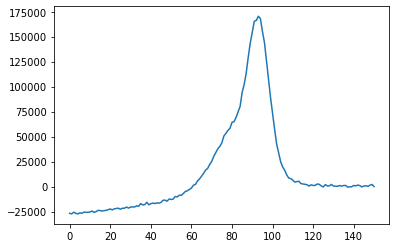

In [67]:
plt.plot(f[experiment][spectra]['isub'][...][0])

In [ ]:
        sdev.__dict__[spectra].E = f[experiment][spectra]['E'][...]
        sdev.__dict__[spectra].I= f[experiment][spectra]['I'][...]
        sdev.__dict__[spectra].esub = f[experiment][spectra]['esub'][...]
        sdev.__dict__[spectra].isub = f[experiment][spectra]['isub'][...]

        """bg"""
        sdev.__dict__[spectra].bg = f[experiment][spectra]['bg'][...]

In [20]:
f = open('/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/load_model_info.pkl', 'rb')   # 'r' for reading; can be omitted
load_dict = pickle.load(f)         # load file content as mydict
f.close() 

In [21]:
load_dict.keys()

dict_keys(['C1s_5comp', 'O1s_3comp', 'Nb3d', 'C1s', 'Si2p', 'O1s_2comp', 'F1s', 'N1s_3comp'])

In [26]:
from xps.pyfit_gui_class_dev import guipyter

In [37]:
restemp.Nb3d.spectra_name

'ResD_21min_UCB_LBL_Nb3d'

In [44]:
id(restemp.O1s.fitting_panel.spectra_object)

140380491455408

In [46]:
id(restemp.Nb3d)

140380491455408

In [51]:
restemp.O1s = guipyter(restemp,'O1s',load_model = 'O1s_2comp')

AttributeError: 'xps_sample' object has no attribute 'E'

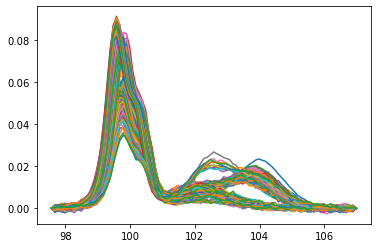

In [10]:
ofset = 0
for i in range(len(si_norm)):
    plt.plot(e,si_norm[i,:]+i*ofset)

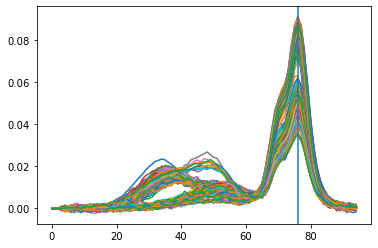

In [14]:

norm = 1

def pad_or_truncate(some_list, target_len):
    return [0]*(target_len - len(some_list)) + list(some_list)

si_cen = np.empty(len(si))
si_amp = np.empty(len(si))
sio2_cen = np.empty(len(si))
sio2_amp = np.empty(len(si))

si_cen_norm = np.empty(len(si))
si_amp_norm = np.empty(len(si))
sio2_cen_norm = np.empty(len(si))
sio2_amp_norm = np.empty(len(si))

mv_spec = np.empty([len(si),len(e)])
mv_spec_norm = np.empty([len(si),len(e)])

for i in range(len(si)):

    si_amp_norm[i],si_cen_norm[i] = guess_from_data(e,si_norm[i],negative = None,peakpos = 99.4,lims=3)
    sio2_amp_norm[i],sio2_cen_norm[i] = guess_from_data(e,si_norm[i],negative = None,peakpos = 104,lims = 3)
    
    si_amp[i],si_cen[i] = guess_from_data(e,si[i],negative = None,peakpos = 99.4,lims=3)
    sio2_amp[i],sio2_cen[i] = guess_from_data(e,si[i],negative = None,peakpos = 104,lims = 3)
    

    mv_ev = np.round(si_cen[i] - 99.4)
    
    mv_pts = np.int(np.round((si_cen[i] - 99.4)*(len(e)/(e[0] - e[-1]))))
    
    if mv_pts ==0:
        mv_spec_norm[i] = si_norm[i]
        mv_spec[i] = si[i]
        
    else:
        mv_spec_norm[i] = pad_or_truncate(si_norm[i][:-1*mv_pts],len(e))
        mv_spec[i] = pad_or_truncate(si[i][:-1*mv_pts],len(e))
        
for i in range(len(si)):
    
    if norm:
        plt.plot(mv_spec_norm[i])
    elif not norm:
        plt.plot(mv_spec[i])
    
plt.axvline(index_of(e,99.4))